# Pulses

ZPGenerator is a time-dynamic simulation framework, meaning that sources are time-evolving quantum systems. Capturing the quantum time dynamics in this way is necessary to explore how errors will arise in an information processing setting. This is very similar to how errors in stationary qubits, like superconducting circuits, arise due to the finite pulse shapes used to implement gates.

Control pulses are created using the Pulse factory class. Let's take a look at some of the basic features of this class.

In [2]:
from zpgenerator import *

The pulse class currently has three class methods that can be used to instantiate common pulse shapes: (1) the dirac() method, (2) the square() method, and the (3) gaussian() method.

## Dirac

The Dirac pulse is an instantaneous pulse applied to a component at an instant in time. This is often used to explore idealised behaviour where operations are applied instantly to the quantum state of a source.

In [6]:
instant_pulse = Pulse.dirac()
instant_pulse.parameters

['area', 'delay', 'phase']

The Dirac pulse has three parameters. The 'area' is the integrated area of the pulse, determining how strongly the pulse interacts with the system; the 'delay' parameter determines the instant that pulse interacts with the system; and the 'phase' parameter determines the complex phase of the pulse amplitude.

In [7]:
instant_pulse.default_parameters

{'area': 3.141592653589793, 'phase': 0, 'delay': 0}

By default, the Dirac pulse arrives at time $t=0$ with a phase of 0 and an integrated area of $\pi$. This type of pulse would instantaneously invert a two-level emitter.

## Square

The square pulse is a pulse with a constant amplitude during a specified interval of time. This is often the first generalisation taken to mimic a realistic pulse because it allows for emission to occur during the pulse timescale, which can cause errors to arise relative to an ideal protocol.

In [16]:
square_pulse = Pulse.square()
square_pulse.default_parameters

{'width': 0.1, 'area': 3.141592653589793, 'phase': 0, 'delay': 0}

In addition to the three parameters seen for the Dirac pulse, we also have a 'width' parameter. Thus, the pulse will begin at 'delay' - 'width'/2 and end at time 'delay' + 'width'/2. For the default values, this corresponds to time $t=-0.05$ until time $t=0.05$.

For non-instantaneous pulses, we can visualise their shapes easily using the plot().show() method that calls matplotlib.

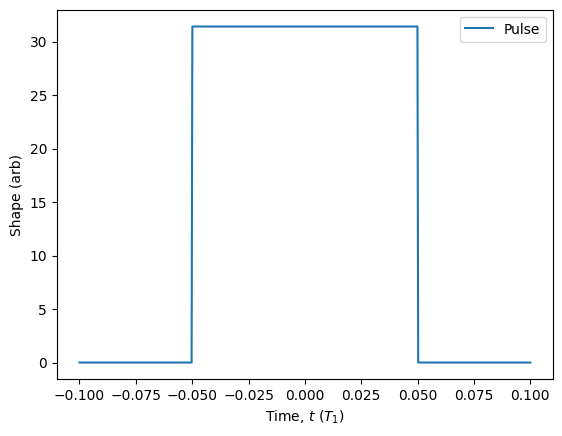

In [17]:
square_pulse.plot(start=-0.1, end=0.1).show()

## Gaussian

The Gaussian pulse is a much more realistic shape to model a laser pulse.

In [18]:
gaussian_pulse = Pulse.gaussian()
gaussian_pulse.default_parameters

{'width': 0.1,
 'area': 3.141592653589793,
 'delay': 0,
 'detuning': 0,
 'phase': 0,
 'window': 6}

In addition to the parameters already seen for the previous two pulses, we also have the 'window' parameter. This parameter is in units of the width, which is the standard deviation of the Gaussian shape. The window determines how many standard deviations to evaluate before assuming the pulse has an amplitude of exactly 0.

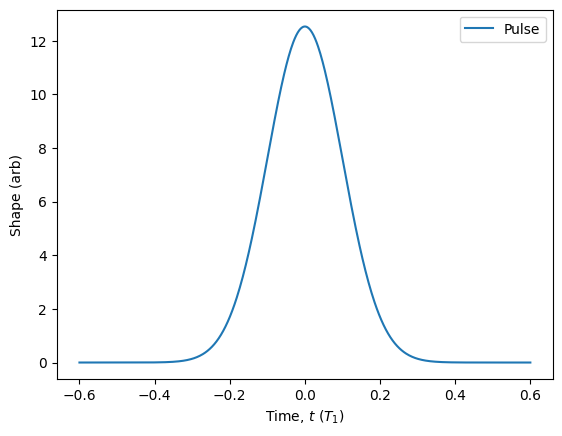

In [19]:
gaussian_pulse.plot().show()

## Custom

In addition to the three basic pulse shapes, the Pulse class also allows for custom shapes to be created using the custom() method. To use this method, we simply need to provide a function f(t, args) along with an interval of time, or 'gate', over which to evaluate the function. Note that even if we do not use the args dictionary, we must always provide it as an argument. If we do use args to parameterise the pulse, we must specify a dictionary of default values using the 'parameters' keyword.

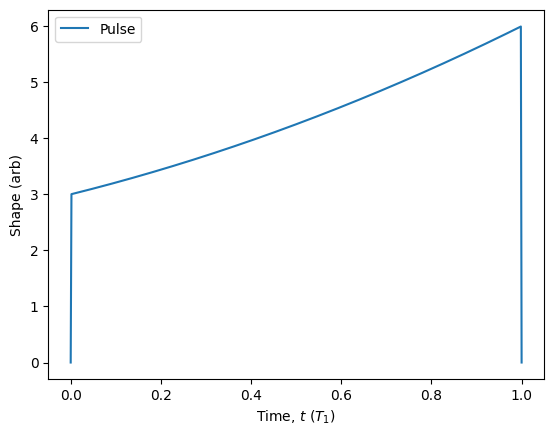

In [29]:
my_pulse = Pulse.custom(shape=lambda t, args: args['a'] + args['b'] * t + args['c'] * t**2,
                        gate=[0, 1],
                        parameters={'a': 3, 'b': 2, 'c': 1})
my_pulse.plot().show()

Having parameterised the pulse allows for easy modification of the pulse later on.

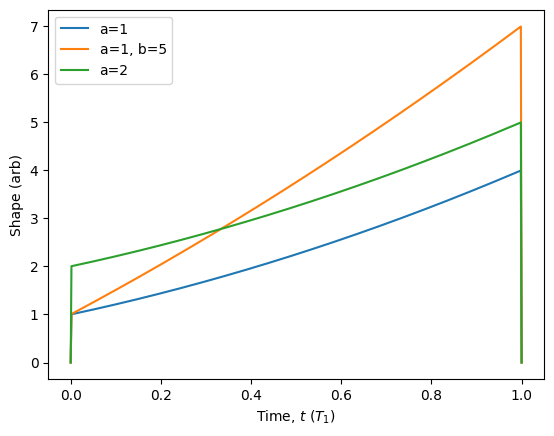

In [33]:
my_pulse.plot(parameters={'a': 1}, label='a=1')
my_pulse.plot(parameters={'a': 1, 'b': 5}, label='a=1, b=5')
my_pulse.plot(parameters={'a': 2}, label='a=2').show()

## Pulse area

The integrated area of a pulse will influence many aspects of the quantum system evolution. For this reason, it is either specified as a parameter for pre-built shapes, or one can evaluate it for custom shapes using the area() method.

In [42]:
my_pulse.area()

1.9999999999999996

In addition, when creating a custom pulse, it is possible to have the shape be automatically normalised. When using this feature, it is best to give the shape an 'area' parameter that multiplies the entire shape, and set its default value to 1.

In [43]:
my_pulse = Pulse.custom(shape=lambda t, args: args['area'] * (args['a'] + args['b'] * t + args['c'] * t**2),
                        gate=[0, 1],
                        parameters={'a': 3, 'b': 2, 'c': 1, 'area': 1},
                        auto_normalise=True)
my_pulse.area()

0.9999999999999998

The default pulse area can be updated afterward.

In [44]:
my_pulse.update_default_parameters({'area': 2})
my_pulse.area()

1.9999999999999996

## Sequences

Most often, pulses need to be combined into pulse sequences to control a quantum system. Alternatively, more complex shapes might be most easily constructed by summing together multiple basic shapes. In either case, the Pulse class also serves as a way to collect and organise multiple pulses into one object.

As a simple example, we can add together some of the pulses we built earlier and then visualise the new composite pulse using the plot() method.

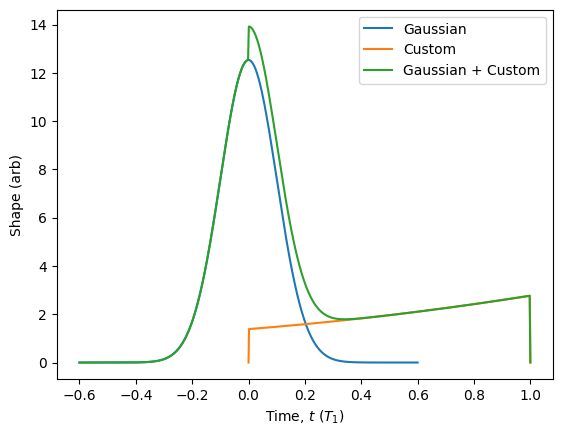

In [64]:
sequence = Pulse()
sequence.add(gaussian_pulse)
sequence.add(my_pulse)

gaussian_pulse.plot(label='Gaussian')
my_pulse.plot(label='Custom')
sequence.plot(label='Gaussian + Custom').show()

Combined with parameter namespaces (see [Parameters](parameters.ipynb)), pulse sequences are extremely useful for manipulating the parameters of large sequences of pulses. See also the [Pulsed Sources](pulsed_sources.ipynb) tutorial for a detailed introduction to using the Pulse class along with the Source class to produce light with different characteristics.